### Heat demand profiles at local authority level using National Grid's Future Energy Scenarios

In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import heat_demand as hdr

In [3]:
LA = 'Aberdeen City'
weather_year = 2015
future_year = 2050
FES_year = '2022'
FES_scenario = 'LW'

In [4]:
LA_heat_pattern_total = hdr.LA_heat_pattern_totals(future_year, FES_year, FES_scenario)
LA_heat_pattern_total[LA].sum(axis=1)

ASHP                                  31630.930037
GSHP                                  37618.794016
Gas boiler                                0.000000
BioLPG boiler                          4113.766043
Biomass boiler                         1778.231731
Community                                15.825815
DH                                    27045.995564
Electric resistive                        0.000000
Electric storage                      11907.620427
Hybrid (ASHP + BioLPG boiler)          1298.214720
Hybrid (ASHP + Hydrogen boiler)         384.755042
Hydrogen boiler                         477.815378
Oil boiler                                0.000000
Hybrid (ASHP + Electric resistive)    26174.403893
dtype: float64

In [5]:
air_temp_daily = pd.read_csv('data/LA_UK/air_temp/average_day_air_temp_' + str(weather_year) + '.csv')
normalised_profiles = {'daytime': pd.read_excel('data/normalised_half_hourly_profiles.xlsx', sheet_name='Total heat daytime HPs', usecols="B:I"),
                           'bi-modal': pd.read_excel('data/normalised_half_hourly_profiles.xlsx', sheet_name='Total heat bimodal HPs', usecols="B:I"),
                           'continuous': pd.read_excel('data/normalised_half_hourly_profiles.xlsx', sheet_name='Total heat continuous HPs', usecols="B:I")}
FES_scaling = hdr.FES_scaling_factor_calc(future_year, FES_year, FES_scenario)
hdr.heat_demand_for_LA_half_hourly(LA, air_temp_daily, weather_year, future_year, FES_year, FES_scenario, FES_scaling, normalised_profiles, LA_heat_pattern_total)

,ASHP,GSHP,Gas boiler,BioLPG boiler,Biomass boiler,Community,DH,Electric resistive,Electric storage,Hybrid (ASHP + BioLPG boiler),Hybrid (ASHP + Hydrogen boiler),Hydrogen boiler,Oil boiler,Hybrid (ASHP + Electric resistive)
2050-01-01 00:00:00,6397.115626,8669.738824,0.0,475.453245,205.521179,1.829087,3125.872067,0.0,3423.085781,150.042661,44.468507,55.224062,0.0,3025.136857
2050-01-01 00:30:00,6510.535956,8877.351427,0.0,464.393963,200.740653,1.786541,3053.162705,0.0,3534.328123,146.552593,43.434147,53.939523,0.0,2954.770647
2050-01-01 01:00:00,6785.913300,9272.101831,0.0,476.079041,205.791688,1.831494,3129.986370,0.0,3701.191636,150.240148,44.527037,55.296749,0.0,3029.118570
2050-01-01 01:30:00,7002.506191,9572.860634,0.0,488.000740,210.945006,1.877357,3208.365697,0.0,3822.763624,154.002376,45.642057,56.681458,0.0,3104.972024
2050-01-01 02:00:00,7523.396434,10233.008110,0.0,538.761949,232.887234,2.072638,3542.095768,0.0,4055.379307,170.021505,50.389685,62.577391,0.0,3427.947219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050-12-31 21:30:00,18463.430337,22449.278623,0.0,2295.858196,992.416159,8.832254,15094.142433,0.0,7461.309658,724.522706,214.728550,266.664740,0.0,14607.714459
2050-12-31 22:00:00,16265.250298,20305.391118,0.0,1834.326521,792.912769,7.056724,12059.797869,0.0,7071.101999,578.873389,171.562109,213.057673,0.0,11671.155516
2050-12-31 22:30:00,14085.216019,18172.767294,0.0,1374.109798,593.977786,5.286253,9034.098469,0.0,6674.700568,433.639042,128.518653,159.603338,0.0,8742.963134
2050-12-31 23:00:00,12444.552864,16560.017695,0.0,1029.426151,444.983557,3.960242,6767.972420,0.0,6368.291006,324.864411,96.280853,119.568211,0.0,6549.865884


In [6]:
filename = 'data/heat_demand_profiles/' + LA + '_' + FES_scenario + '_' + FES_year + '_' + str(weather_year) + '_' + str(future_year) + '.csv'
hd_df = pd.read_csv(filename, index_col=0)
hd_df.index = pd.to_datetime(hd_df.index)

In [7]:
hd_df.columns

Index(['ASHP', 'GSHP', 'Gas boiler', 'BioLPG boiler', 'Biomass boiler',
       'Community', 'DH', 'Electric resistive', 'Electric storage',
       'Hybrid (ASHP + BioLPG boiler)', 'Hybrid (ASHP + Hydrogen boiler)',
       'Hydrogen boiler', 'Oil boiler', 'Hybrid (ASHP + Electric resistive)'],
      dtype='object')

<AxesSubplot: >

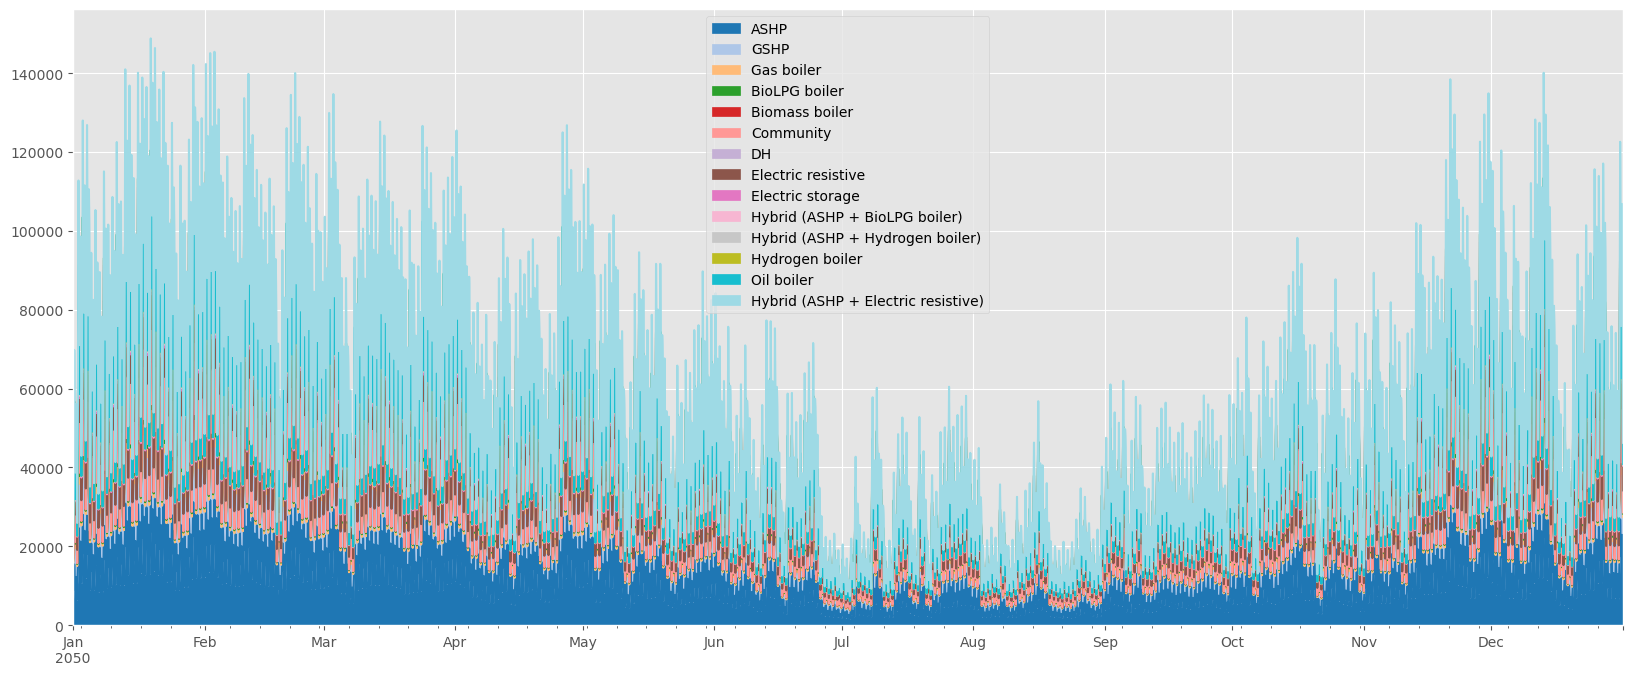

In [8]:
plt.style.use('ggplot')
hd_df.plot.area(figsize=(20,8), cmap='tab20')

<AxesSubplot: >

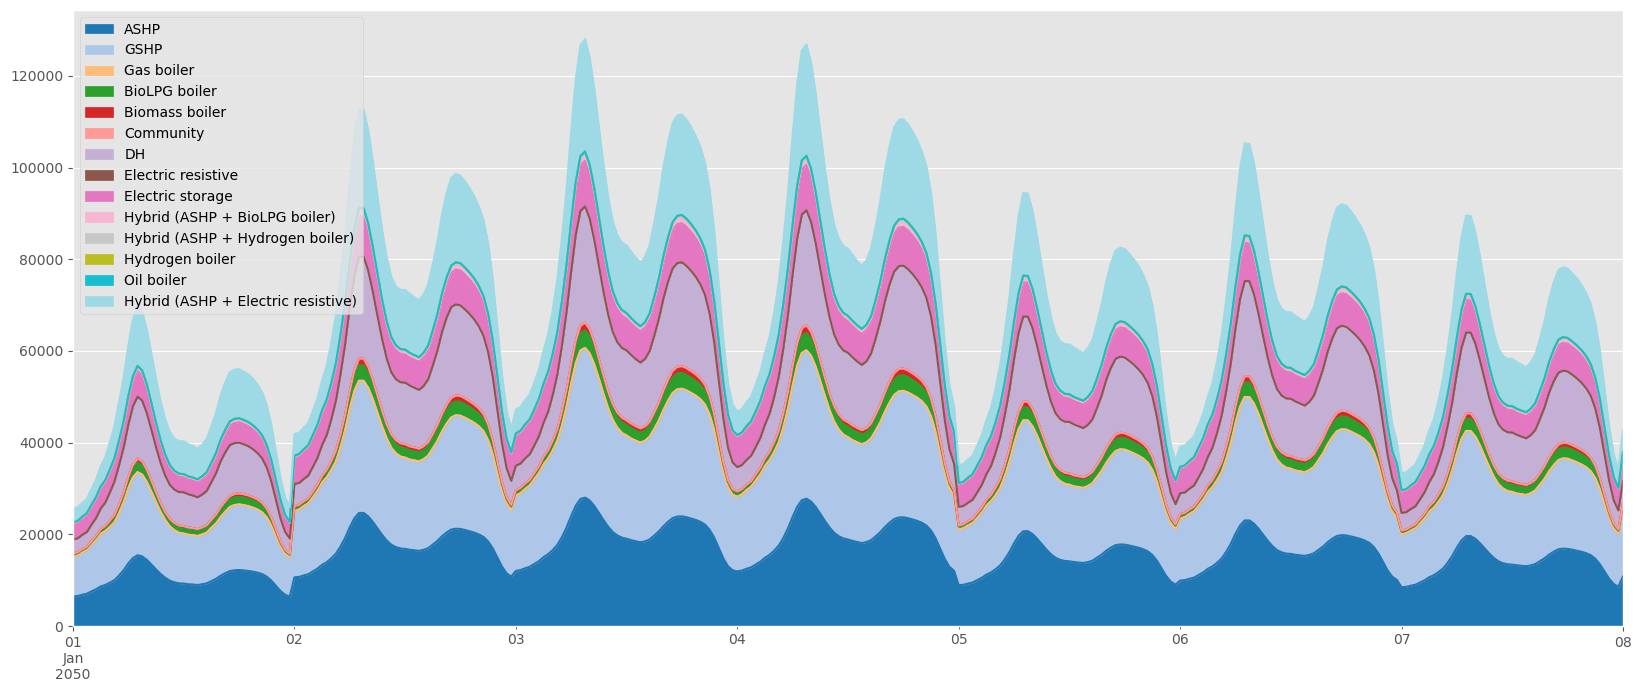

In [9]:
plt.style.use('ggplot')
hd_df['2050-01-01 00:00:00': '2050-01-08 00:00:00'].plot.area(figsize=(20,8), stacked=True, cmap='tab20')

In [12]:
hd_df.sum().sum()

913834584.7869216